In [1]:
import geopandas as gpd
from pathlib import Path
import pandas as pd

In [2]:
# gdf = gpd.read_file(
#     r"Z:\GIS_Library\County\Kern\Kern_Parcels.shp",
#     # bbox=service_boundary.total_bounds,
# 	# bbox=service_boundary,
# )
# gdf.to_parquet("data\\apns.parquet")

<Axes: >

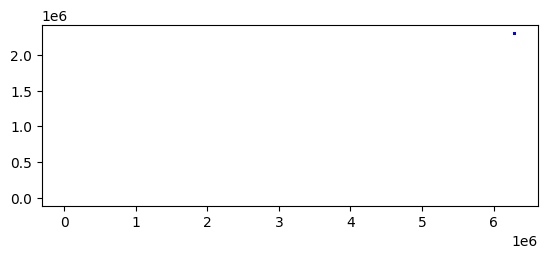

In [3]:
full_gdf = gpd.read_parquet("data\\gdf.parquet")
service_boundary = full_gdf.pipe(lambda df:df.loc[df['label'] == "Frick Unit North Service Area"])
# clip = lambda gdf: gdf.clip(service_boundary)
gdf = gpd.read_file(
    r"Z:\GIS_Library\County\Kern\Kern_Parcels.shp",
    # bbox=service_boundary.total_bounds,
	bbox=service_boundary,
)
# gdf = gdf.to_crs("EPSG:4326")
ax = service_boundary.plot(color="red")
gdf.plot(ax=ax, color="none", edgecolor="blue")

<Axes: >

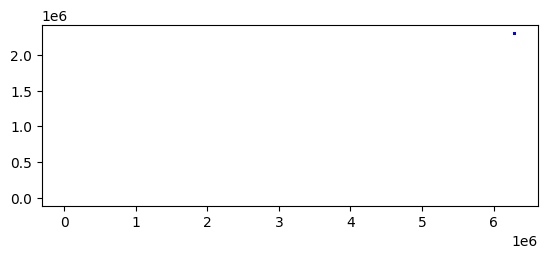

In [4]:
gdf = gpd.read_file(
    r"Z:\GIS_Library\County\Kern\Kern_Parcels_Owners.shp",
    # bbox=service_boundary.total_bounds,
	bbox=service_boundary,
)
# gdf = gdf.to_crs("EPSG:4326")
ax = service_boundary.plot(color="red")
gdf.plot(ax=ax, color="none", edgecolor="blue")

In [5]:
gdf.to_clipboard()

In [6]:
gdf.rename(columns={
    "APN_LABEL": "apn",
    "SHAPE_ACRE": "acreage",
    "ASSE_NAME": "landowner",
}).to_parquet("data\\apns.parquet")

In [8]:
# gdf['APN_DASH'].iloc[0]
# gdf.head(2)

In [9]:
# gdf.to_parquet("data\\apns.parquet")

In [10]:
apn_gdf = gpd.read_parquet("data\\apns.parquet")

In [11]:
apn_gdf.head(2)

,APN,APN9,apn,SHAPE_SQFT,acreage,OID_,TE_NO,APN9_1,ATN,ROLL,...,LEGAL_DESC,ACRES,AG_PRES,CITRUS_AC,APN_1,Community,Systm_Name,PWSID,MapUse,geometry
0,17401101,174011015,174-011-01,834483,19.16,113757,129869.0,174011015,17401101010,1,...,"SECTION 24 , TOWNSHIP 30 , RANGE 28 , QUARTER",17.87,AG PRESERVE,0.0,174011015,NaN,NaN,NaN,NaN,"POLYGON ((6288809.845 2296669.267, 6288181.769..."
1,17401102,174011023,174-011-02,866279,19.89,113758,129871.0,174011023,17401102013,1,...,"SECTION 24 , TOWNSHIP 30 , RANGE 28 , QUARTER",20.00,AG PRESERVE,0.0,174011023,NaN,NaN,NaN,NaN,"POLYGON ((6288195.979 2297994.001, 6288181.769..."


In [12]:
# gdf=gpd.read_file(r"G:\Arvin-Edison WSD-1215\121519004-FFP Frick Unit\GIS\Feature\Laterals\Frick_NorthSouth_Laterals.shp")
# gdf=gpd.read_file(r"G:\Arvin-Edison WSD-1215\121519005-DiGiorgio Unit\GIS\Feature\AEWSD_Alignments.shp")
# gdf.head(2)


In [13]:

layers = {
	# "Parcels":{
	# 	# "shp":r"Z:\GIS_Library\County\Kern\Kern_Parcels",
	# 	"shp":r"\\ppeng.com\pzdata\gis\GIS_Library\County\Kern\Kern_Parcels",
	# 	"color":"gray",
	# 	# "label":"APNs",
	# 	"label":"APN_DASH",
	# },
	"Proposed Pipeline":{
		"shp":r"G:\Arvin-Edison WSD-1215\121519004-FFP Frick Unit\GIS\Feature\Laterals\Frick_NorthSouth_Laterals",
		"color":"orange",
		"label":"SWSA",
	},
	"AEWSD Alignments":{
        # "shp":r"G:\Arvin-Edison WSD-1215\121519005-DiGiorgio Unit\GIS\Feature\AEWSD_Alignments",
        "shp":r"data\pipeline",
        "color":"orange",
        "label":"Name",
	},
	"District Boundary":{
		"shp":r"\\ppeng.com\pzdata\clients\Arvin-Edison WSD-1215\121519004-FFP Frick Unit\GIS\Feature\From_AE\AEWSD_New_boundary",
		"color":"black",
		"label":"WDNAME",
	},
	"AEWSD North Canal":{
		"shp":r"\\ppeng.com\pzdata\clients\Arvin-Edison WSD-1215\121519004-FFP Frick Unit\GIS\Feature\From_AE\District_canal",
		"color":"blue",
		"label":"CANAL",
	},
	"FFPPP Discharge Pipeline":{
		"shp":r"\\ppeng.com\pzdata\clients\Arvin-Edison WSD-1215\121519004-FFP Frick Unit\GIS\Feature\From_AE\FFPP_discharge_pipeline",
		"color":"red",
		"label":"CANAL",
	},
	"Frick Unit Service Area":{
		"shp":r"G:\Arvin-Edison WSD-1215\121519005-DiGiorgio Unit\GIS\Feature\proposed_SWSAs",
		"color":"red",
		"label":"Name",
	},
	"Proposed Turnout":{
		# "gdb":r"Z:\GIS_Library\_Clients\ArvinEdison_WSD.gdb",
		"gdb":r"\\ppeng.com\pzdata\gis\GIS_Library\_Clients\ArvinEdison_WSD.gdb",
		"layer":"turnouts",
		"color":"yellow",
		"label":"TURNOUT__",
	},
}

def get_layer(name,info):
	if "shp" in info:
		gdf = gpd.read_file(Path(info["shp"]+".shp"))
		
	elif "gdb" in info:
		gdb = Path(info["gdb"])
		gdf = gpd.read_file(gdb,layer=info["layer"])
	
	gdf["color"] = info["color"]
	gdf["label"] = gdf[info["label"]]
	gdf["layer"] = name
	print(name)
	print(gdf.crs)
	
	
	return gdf[['color','label',"layer","geometry"]]#.to_crs(epsg=4326)

# Create gdb
gdfs = {name:get_layer(name,info) for name,info in layers.items()}

Proposed Pipeline
EPSG:6424
AEWSD Alignments
EPSG:6424
District Boundary
EPSG:2229
AEWSD North Canal
EPSG:2229
FFPPP Discharge Pipeline
EPSG:2229
Frick Unit Service Area
EPSG:2229
Proposed Turnout
EPSG:6424


In [14]:
gdfs.keys()
gdfs['AEWSD Alignments'].head(2)

,color,label,layer,geometry
0,orange,Frick Unit North,AEWSD Alignments,"LINESTRING Z (6296617.147 2304571.381 0.000, 6..."
1,orange,Frick Unit North,AEWSD Alignments,"LINESTRING Z (6296636.767 2304575.932 0.000, 6..."


In [15]:
epsg = 4326
# epsg = 26745
# epsg = 2229
# epsg = 6424
gdf = pd.concat([gdf.to_crs(epsg=epsg) for gdf in gdfs.values()])
gdf.to_parquet("data\\gdf.parquet")

In [16]:
# gdf

Proposed Pipeline


,color,label,layer,geometry
0,orange,NORTH,Proposed Pipeline,"LINESTRING (6296914.875 2304574.529, 6290259.0..."
1,orange,NORTH,Proposed Pipeline,"LINESTRING (6296874.656 2300600.709, 6291526.4..."
2,orange,NORTH,Proposed Pipeline,"LINESTRING (6296863.700 2297959.543, 6298208.2..."
3,orange,NORTH,Proposed Pipeline,"LINESTRING (6296838.607 2295297.107, 6291500.4..."
4,orange,SOUTH,Proposed Pipeline,"LINESTRING (6302164.959 2292630.952, 6302178.1..."


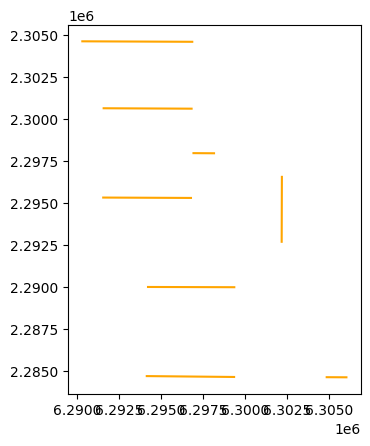

AEWSD Alignments


,color,label,layer,geometry
0,orange,Frick Unit North,AEWSD Alignments,"LINESTRING Z (6296617.147 2304571.381 0.000, 6..."
1,orange,Frick Unit North,AEWSD Alignments,"LINESTRING Z (6296636.767 2304575.932 0.000, 6..."


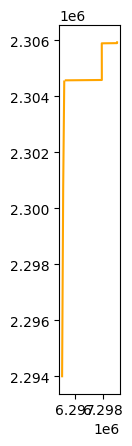

District Boundary


,color,label,layer,geometry
0,black,ARVIN-EDISON W.S.D.,District Boundary,"POLYGON ((6300167.991 2266304.097, 6300147.806..."


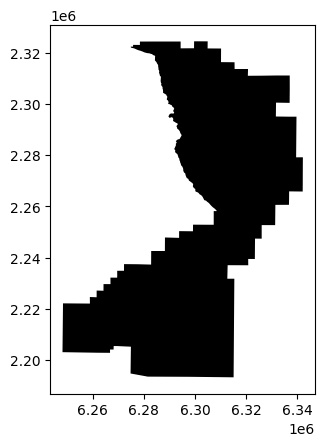

AEWSD North Canal


,color,label,layer,geometry
0,blue,South Canal,AEWSD North Canal,"LINESTRING (6328755.166 2261038.579, 6328723.1..."
1,blue,Intertie Pipeline,AEWSD North Canal,"LINESTRING (6270376.469 2216287.034, 6268544.0..."
2,blue,Intake Canal,AEWSD North Canal,"LINESTRING (6283138.683 2303072.384, 6282896.4..."
3,blue,North Canal,AEWSD North Canal,"LINESTRING (6298819.620 2306011.119, 6299769.3..."
4,blue,SOUTH CANAL 2,AEWSD North Canal,"LINESTRING (6304086.637 2233056.045, 6304085.2..."


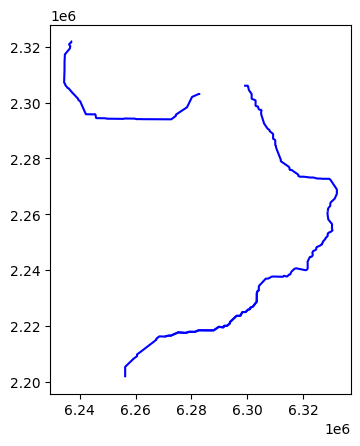

FFPPP Discharge Pipeline


,color,label,layer,geometry
0,red,Discharge Pipeline,FFPPP Discharge Pipeline,"LINESTRING (6298819.620 2306000.000, 6295946.6..."


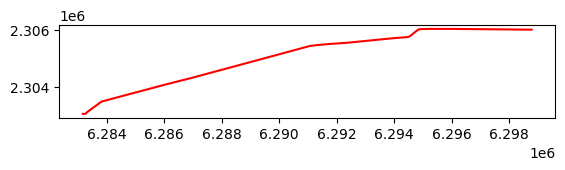

Frick Unit Service Area


,color,label,layer,geometry
0,red,Frick Unit North Service Area,Frick Unit Service Area,"POLYGON Z ((6292789.326 2292680.742 0.000, 629..."
1,red,Frick Unit South L2 Service Area,Frick Unit Service Area,"POLYGON Z ((6299433.691 2292600.894 0.000, 629..."
2,red,Frick Unit South L1 Service Area,Frick Unit Service Area,"POLYGON Z ((6299477.596 2292684.127 0.000, 629..."
3,red,Sycamore,Frick Unit Service Area,"POLYGON Z ((6315433.626 2250214.106 0.000, 631..."
4,red,South Alignment 1 Service Area,Frick Unit Service Area,"POLYGON Z ((6299124.805 2226522.764 0.000, 628..."


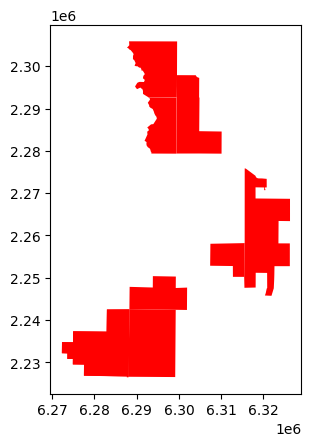

Proposed Turnout


,color,label,layer,geometry
0,yellow,N8-P1,Proposed Turnout,POINT (6303060.326 2300743.090)
1,yellow,N8-P2,Proposed Turnout,POINT (6309731.183 2300657.617)
2,yellow,N8-P3,Proposed Turnout,POINT (6317854.572 2300418.451)
3,yellow,N8-P4,Proposed Turnout,POINT (6322819.323 2300583.393)
4,yellow,A-62,Proposed Turnout,POINT (6325541.895 2303248.236)


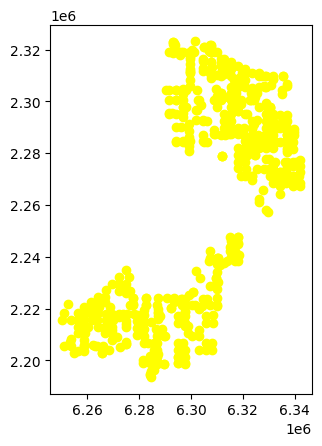

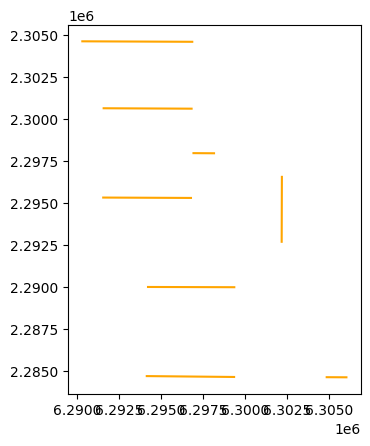

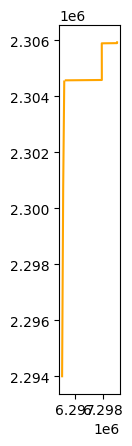

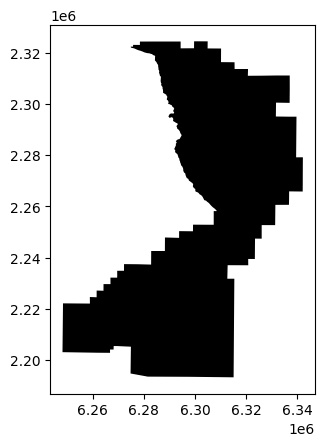

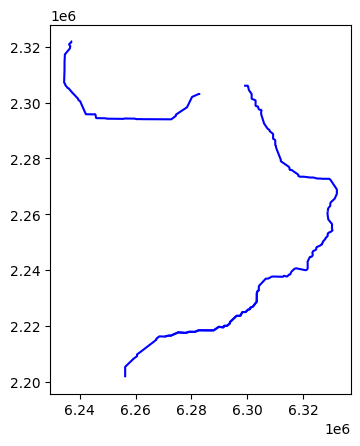

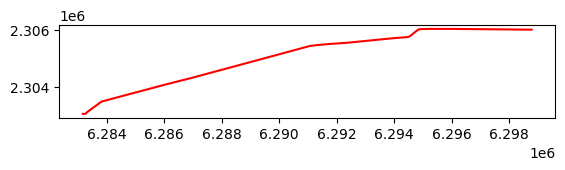

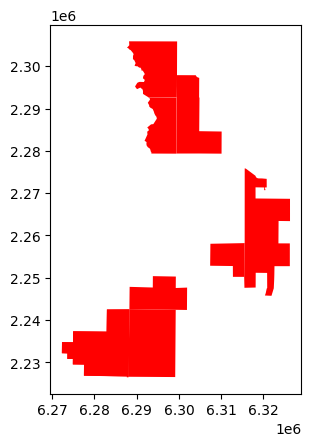

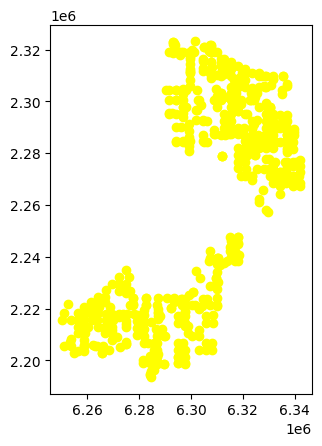

In [17]:
names = list(gdfs.keys())
from IPython.display import display
for name in names:
	print(name)
	gdf = gdfs[name]
	display(gdf.head())
	display(gdf.plot(color=layers[name]["color"]).figure)
	